# Contents:



*   [About Data](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
*   [Preprocessing](#prep)
*   [Exploratory Data Analysis](#eda)
*   [Modeling](#model)
*   [Some Rules](#conc)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)


# configuration
plt.style.use('seaborn-pastel')
plt.rcParams['axes.grid'] = False

# Data:

In [2]:
#!unzip "/content/drive/MyDrive/Market.zip" -d "/content/drive/MyDrive/Market"

In [3]:
cd /content/drive/MyDrive/Market/

/content/drive/MyDrive/Market


In [4]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.shape

(38765, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

<a name = 'prep'></a>
# Preprocessing:

In [8]:
# make copy of the data
dfc = df.copy()

In [9]:
dfc.Date = pd.to_datetime(dfc.Date)

In [10]:
dfc.set_index('Date', inplace= True)

<a name = 'eda'></a>
# EDA:

In [11]:
print(f"Number of users: {dfc.Member_number.nunique()}")

Number of users: 3898


In [12]:
print(f"Number of items: {dfc.itemDescription.nunique()}")

Number of items: 167


In [13]:
print(f'Data from: {dfc.index.min()} to {dfc.index.max()}')

Data from: 2014-01-01 00:00:00 to 2015-12-30 00:00:00


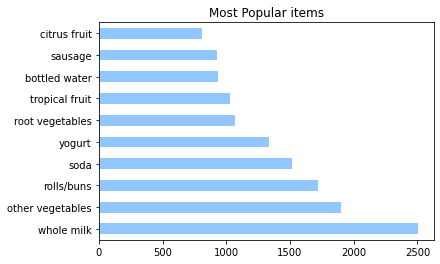

In [14]:
# Most popular items:
top_items = df.itemDescription.value_counts(ascending = False)[:10]
top_items.plot(kind = 'barh')
plt.title("Most Popular items")
plt.savefig('top_items.png')
plt.show()

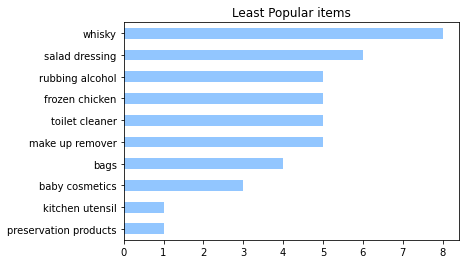

In [15]:
# Least popular items:
low_items = df.itemDescription.value_counts(ascending = True)[:10]
low_items.plot(kind = 'barh')
plt.title("Least Popular items")
plt.savefig('unpop_items.png')
plt.show()

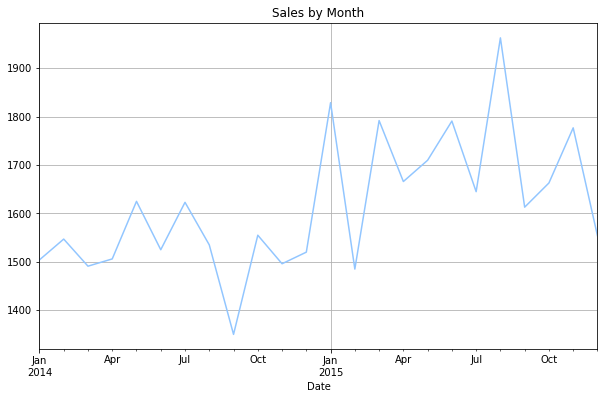

In [16]:
# Monthly sales
plt.figure(figsize=(10, 6))
dfc.resample("M")['itemDescription'].count().plot(kind = 'line', grid = True)
plt.title("Sales by Month")
plt.savefig('sales_month.png')
plt.show()


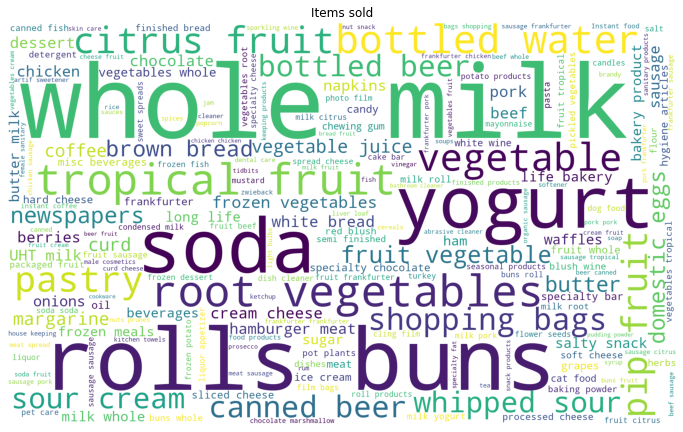

In [17]:
plt.figure(figsize= (12, 10))
wordcloud = WordCloud(background_color = 'white', height = 1200, width = 2000).generate(' '.join(dfc['itemDescription']))
plt.axis('off')
plt.title("Items sold")
wordcloud.to_file('wc.png')
plt.imshow(wordcloud);


<a name = 'model'></a>
# Modeling:

## preparation:

In [18]:
grouped = dfc.groupby(['Member_number', 'Date'])['itemDescription'].sum()
grouped

Member_number  Date      
1000           2014-06-24                   whole milkpastrysalty snack
               2015-03-15    sausagewhole milksemi-finished breadyogurt
               2015-05-27                        sodapickled vegetables
               2015-07-24                    canned beermisc. beverages
               2015-11-25                       sausagehygiene articles
                                                ...                    
4999           2015-05-16                 butter milkwhipped/sour cream
               2015-12-26                            bottled waterherbs
5000           2014-09-03                   fruit/vegetable juiceonions
               2014-11-16                  bottled beerother vegetables
               2015-10-02        sodaroot vegetablessemi-finished bread
Name: itemDescription, Length: 14963, dtype: object

In [19]:
transactions = [a[1]['itemDescription'].tolist() for a in list(dfc.groupby(['Member_number','Date']))]
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [20]:
encoder = TransactionEncoder()
tr_ary = encoder.fit(transactions).transform(transactions)
tr_ary

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
encoder.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [22]:
transactions = pd.DataFrame(tr_ary, columns=encoder.columns_)
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
tr_desc = transactions.describe()
tr_desc

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


## Model:

In [24]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, max_len= 4).sort_values(by='support', ascending = False)
freq_items.head(25)

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


In [25]:
rules = association_rules(freq_items, metric="lift", min_threshold=1).sort_values('lift', ascending = False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
85,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
83,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
86,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
102,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081


In [26]:
rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
85,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
83,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
86,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
102,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
103,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
82,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
87,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
199,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
198,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969


<a name = 'conc'></a>
# Some Rules:


*   frankfurter -> other vegetables
*   sausage -> soda
*   sausage -> whole milk, yogurt
*   citrus fruit -> specialty chocolate
*   napkins -> pastry



# Save the rules:

In [27]:
rules.to_csv("rules.csv", index= False)